## Accidentes de Tráfico en Madrid

* Accederemos a los datos de accidentes de tráfico de Madrid durante 2019.
* Realizaremos un análisis exploratorio inicial y una limpieza de los datos para poder utilizarlos para responder nuestras inquietudes:

* ¿Cuántos accidentes hubo en Madrid en 2019 por cada tipo de vehículo? ¿Cuántas personas se vieron involucradas y en qué rol? 
* ¿Cuál es la distribución de accidentes por sexo y por edad? ¿En qué distritos de Madrid se producen más y menos accidentes?

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
accidentes_raw = pd.read_csv(r'C:\Users\andre\OneDrive\Documentos\IMF Data science\Mini Projects\Modulo 2\accidentes2019.csv', encoding='latin1', sep= ';')
accidentes_raw.head()

,Nº EXPEDIENTE,FECHA,HORA,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO EDAD,SEXO,LESIVIDAD*,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.
0,2019S000020,01/01/2019,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN
1,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN
2,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,NaN
3,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,NaN
4,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,NaN


## Limpieza de datos

Vamos a analizar y limpiar columna por columna, ya que vemos que cada una es un caso distinto. Para facilitarlo, escribimos una pequeña función que nos proporciona los datos más relevantes para esa limpieza

In [185]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Numero de valores nulos: {df[col].isnull().sum()}  -  Numero de valores distintos: {df[col].nunique()}')
    print('Valores mas frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items():
          print(i, '\t', v)
describe_columna(accidentes_raw, 'Nº  EXPEDIENTE')

Columna: Nº  EXPEDIENTE  -  Tipo de datos: object
Numero de valores nulos: 0  -  Numero de valores distintos: 21935
Valores mas frecuentes:
2019S036555 	 13
2019S000625 	 12
2019S032214 	 12
2019S028162 	 12
2019S029891 	 12
2019S013324 	 12
2019S038336 	 12
2019S022757 	 11
2019S022408 	 11
2019S017281 	 11


In [186]:
accidentes_raw['CALLE'].value_counts()

PASEO. CASTELLANA                                       719
CALL. ALCALA                                            646
CALL. BRAVO MURILLO                                     265
AVDA. ALBUFERA                                          264
CALL. FRANCISCO SILVELA                                 179
                                                       ... 
AUTOV. M-30, C-2 PK 0.500                                 1
CALL. MARGARITA DE PARMA / CALL. MARIA DE PORTUGAL        1
AVDA. SUR DEL AEROPUERTO DE BARAJAS / CALL. ZAOREJAS      1
PLAZA. SANTA CRUZ                                         1
CALL. VITRUVIO / PASEO. CASTELLANA                        1
Name: CALLE, Length: 10456, dtype: int64

In [187]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Numero de valores nulos: {df[col].isnull().sum()}  -  Numero de valores distintos: {df[col].nunique()}')
    print('Valores mas frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items():
        print(i,'',v)
describe_columna(accidentes_raw, 'Nº  EXPEDIENTE')

Columna: Nº  EXPEDIENTE  -  Tipo de datos: object
Numero de valores nulos: 0  -  Numero de valores distintos: 21935
Valores mas frecuentes:
2019S036555  13
2019S000625  12
2019S032214  12
2019S028162  12
2019S029891  12
2019S013324  12
2019S038336  12
2019S022757  11
2019S022408  11
2019S017281  11


Nada particulamente interesante en esta columna. Vemos que el número de expediente no es único (el valor más usado, el primero de la lista de valores, se usa un total de 13 veces): leyendo el documento de descripción de los datos, o simplemente inspeccionando los datos, podemos ver que el número de expediente identifica un accidente, pero en él pueden haber estado involucrados varios vehículos o más de una persona, y para cada uno de ellos existe una línea en este fichero. El número de accidentes, por lo tanto, no es el número de filas del fichero, sino el número de valores únicos del campo Nº  EXPEDIENTE.

El unico cambio que realizaremos en esta columna de EXPEDIENTE será corregir el nombre del campo para que no tenga doble espacio entre 'Nº' y 'EXPEDIENTE' y pasar el nombre a minusculas

In [188]:
accidentes_raw.rename(columns={'Nº  EXPEDIENTE': 'Nº Expediente'}, inplace=True)
accidentes_raw.columns
#Se ha realizado el cambio correctamente

Index(['Nº Expediente', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO EDAD', 'SEXO', 'LESIVIDAD*',
       '* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.'],
      dtype='object')

Continuamos con las siguientes columnas

In [189]:
describe_columna(accidentes_raw, 'CALLE')

Columna: CALLE  -  Tipo de datos: object
Numero de valores nulos: 0  -  Numero de valores distintos: 10456
Valores mas frecuentes:
PASEO. CASTELLANA  719
CALL. ALCALA  646
CALL. BRAVO MURILLO  265
AVDA. ALBUFERA  264
CALL. FRANCISCO SILVELA  179
CALL. SERRANO  177
PASEO. SANTA MARIA DE LA CABEZA  169
PASEO. EXTREMADURA  167
CALL. PRINCIPE DE VERGARA  167
CALL. DOCTOR ESQUERDO  153


In [190]:
#Cambiemos el nombre de la columna de 'CALLE' a 'Calle'
accidentes_raw.rename(columns={'CALLE': 'Calle'}, inplace=True)
accidentes_raw.columns

Index(['Nº Expediente', 'FECHA', 'HORA', 'Calle', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO EDAD', 'SEXO', 'LESIVIDAD*',
       '* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.'],
      dtype='object')

In [191]:
describe_columna(accidentes_raw, 'NÚMERO')

Columna: NÚMERO  -  Tipo de datos: object
Numero de valores nulos: 4  -  Numero de valores distintos: 604
Valores mas frecuentes:
-  28523
1  1489
2  1077
3  701
4  642
0  519
7  494
5  448
8  421
6  388


Podría ser buena idea convertir el campo "Número" a tipo numérico en vez de objeto, comprobemos si todos los datos de esta columna podrían pasarse a numérico

In [192]:
accidentes_raw['NÚMERO'].str.isnumeric().value_counts()
# Hay 29,306 instancias donde el valor en la columna 'NÚMERO' no es numérico
# 22496 donde si lo es.

False    29306
True     22496
Name: NÚMERO, dtype: int64

Comprobemos que tienen esos 29306 campos que no son numéricos

In [193]:
non_numeric = accidentes_raw[accidentes_raw['NÚMERO'].str.isnumeric() == False]['NÚMERO'].value_counts()
non_numeric

-        28523
 1A         68
 5A         35
 2A         30
 259A       19
         ...  
 246C        1
 200A        1
 4H          1
 T-3         1
 150A        1
Name: NÚMERO, Length: 161, dtype: int64

Vemos que aunque se llama NÚMERO contiene valores que son cadenas de texto como '1A'. También vemos que hay un valor muy frecuente '-' que se está utilizando para indicat que no hay información disponible.
A falta de datos lo mejor es utilizar el mecanismo estándar de Pandas, los valores NaN.

In [194]:
accidentes_raw.rename(columns={'NÚMERO': 'Número'}, inplace=True)

accidentes_raw['Número'] = accidentes_raw['Número'].replace('-', np.NaN)

Siguiente Columna...

In [195]:
describe_columna(accidentes_raw, 'DISTRITO')

Columna: DISTRITO  -  Tipo de datos: object
Numero de valores nulos: 5  -  Numero de valores distintos: 21
Valores mas frecuentes:
SALAMANCA  4078
PUENTE DE VALLECAS  4063
CHAMARTÍN  3891
CARABANCHEL  3365
CIUDAD LINEAL  3362
SAN BLAS-CANILLEJAS  2797
CENTRO  2752
MONCLOA-ARAVACA  2688
CHAMBERÍ  2680
RETIRO  2671


In [196]:
accidentes_raw.rename(columns={'DISTRITO': 'Distrito'}, inplace = True)
#Los 5 valores nulos ya están como NaN

Como el número de valores únicos de este campo es pequeño, y además los valores posibles están limitados, conviene convertir el valor a tipo "category", ya que esto reduce el almacenamiento necesario, acelera los cálculos y facilita el análisis

In [197]:
accidentes_raw['Distrito'] = accidentes_raw['Distrito'].astype('category')

Siguiente columna...

In [198]:
accidentes_raw.rename(columns={'ESTADO METEREOLÓGICO': 'Estado Metereológico'}, inplace=True)
describe_columna(accidentes_raw, 'Estado Metereológico')
#Los valores nulos ya están como NaN

Columna: Estado Metereológico  -  Tipo de datos: object
Numero de valores nulos: 5132  -  Numero de valores distintos: 7
Valores mas frecuentes:
Despejado  39984
Lluvia débil  3465
Nublado  1862
Se desconoce  695
LLuvia intensa  652
Granizando  14
Nevando  2


In [199]:
# En las filas donde aparece 'Se desconoce' realmente es que no tenemos datos por lo tanto cambiaremos esto por valores NaN también
accidentes_raw['Estado Metereológico'] = accidentes_raw['Estado Metereológico'].replace('Se desconoce', np.NaN)

Siguiente Columna...

In [200]:
accidentes_raw.rename(columns={'RANGO EDAD': 'Rango Edad'}, inplace=True)
describe_columna(accidentes_raw, 'Rango Edad')

Columna: Rango Edad  -  Tipo de datos: object
Numero de valores nulos: 0  -  Numero de valores distintos: 18
Valores mas frecuentes:
DE 40 A 44 AÑOS  5736
DE 25 A 29 AÑOS  5610
DE 35 A 39 AÑOS  5573
DE 30 A 34 AÑOS  5463
DESCONOCIDA  5333
DE 45 A 49 AÑOS  4955
DE 50 A 54 AÑOS  4258
DE 21 A 24 AÑOS  3350
DE 55 A 59 AÑOS  3265
DE 60 A 64 AÑOS  2036


In [201]:
#Cambiamos 'DESCONOCIDA' a que se presente como valores NaN
accidentes_raw['Rango Edad'] = accidentes_raw['Rango Edad'].replace('DESCONOCIDA', np.NaN)

describe_columna(accidentes_raw, 'Rango Edad')      

Columna: Rango Edad  -  Tipo de datos: object
Numero de valores nulos: 5333  -  Numero de valores distintos: 17
Valores mas frecuentes:
DE 40 A 44 AÑOS  5736
DE 25 A 29 AÑOS  5610
DE 35 A 39 AÑOS  5573
DE 30 A 34 AÑOS  5463
DE 45 A 49 AÑOS  4955
DE 50 A 54 AÑOS  4258
DE 21 A 24 AÑOS  3350
DE 55 A 59 AÑOS  3265
DE 60 A 64 AÑOS  2036
DE 18 A 20 AÑOS  1534


Ultima columna...

In [202]:
accidentes_raw.rename(columns={'LESIVIDAD*': 'Lesividad'}, inplace=True)
describe_columna(accidentes_raw, 'Lesividad')

Columna: Lesividad  -  Tipo de datos: float64
Numero de valores nulos: 21776  -  Numero de valores distintos: 9
Valores mas frecuentes:
14.0  16599
7.0  7110
2.0  2157
6.0  1555
1.0  1320
5.0  715
3.0  539
4.0  34
77.0  1


El campo "LESIVIDAD*" presenta un caso interesante: los valores están codificados, y la clave para entenderlos está en el documento de explicación de los datos. Allí se describen los valores de esta manera:

LESIVIDAD | Descripción
--- | --- 
01        |  Atención en urgencias sin posterior ingreso. - LEVE
02        |  Ingreso inferior o igual a 24 horas - LEVE 
03        |  Ingreso superior a 24 horas. - GRAVE
04        |  Fallecido 24 horas - FALLECIDO
05        |  Asistencia sanitaria ambulatoria con posterioridad - LEVE
06        |  Asistencia sanitaria inmediata en centro de salud o mutua - LEVE
07        |  Asistencia sanitaria sólo en el lugar del accidente - LEVE
14        |  Sin asistencia sanitaria
77        |  Se desconoce
En blanco |  Sin asistencia sanitaria

Asignaremos los valores en blanco leidos en la columna Lesividad con NaN a la categoría 14, y los valores de la categoría 77 los asignaremos como NaN

In [203]:
#Observamos que en la descripción la Lesividad puede dividirse en 4 grandes grupos:
# estos serían: Ileso (Sin asistencia sanitaria), Leve, Grave y Fallecido. 
# Agruparemos esto más adelante

accidentes_raw['Lesividad'] = accidentes_raw['Lesividad'].replace(77, np.NaN)
accidentes_raw['Lesividad'] = accidentes_raw['Lesividad'].fillna(14)

In [204]:
describe_columna(accidentes_raw, 'Lesividad')

Columna: Lesividad  -  Tipo de datos: float64
Numero de valores nulos: 0  -  Numero de valores distintos: 8
Valores mas frecuentes:
14.0  38376
7.0  7110
2.0  2157
6.0  1555
1.0  1320
5.0  715
3.0  539
4.0  34


In [205]:
# Definición del tipo categórico para los grados de gravedad
grados_gravedad = pd.CategoricalDtype(['Ileso', 'Leve', 'Grave', 'Fallecido'], ordered=True)

# Definimos un diccionario que mapee los valores del Lesividad con los de Gravedad

dict_gravedad = {1: 'Leve', 2: 'Leve', 3: 'Grave', 4: 'Fallecido', 5: 'Leve', 6: 'Leve', 7: 'Leve', 14: 'Ileso'}



In [206]:
#Creamos columna Gravedad para entender mejor los números de Lesividad
accidentes_raw['Gravedad'] = accidentes_raw['Lesividad'].map(dict_gravedad)
accidentes_raw.head(6)

,Nº Expediente,FECHA,HORA,Calle,Número,Distrito,TIPO ACCIDENTE,Estado Metereológico,TIPO VEHÍCULO,TIPO PERSONA,Rango Edad,SEXO,Lesividad,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.,Gravedad
0,2019S000020,01/01/2019,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN,Leve
1,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN,Ileso
2,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,NaN,Grave
3,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,NaN,Ileso
4,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,NaN,Leve
5,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,NaN,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Pasajero,DE 18 A 20 AÑOS,Mujer,14.0,NaN,Ileso


In [207]:
describe_columna(accidentes_raw, 'Gravedad')

Columna: Gravedad  -  Tipo de datos: object
Numero de valores nulos: 0  -  Numero de valores distintos: 4
Valores mas frecuentes:
Ileso  38376
Leve  12857
Grave  539
Fallecido  34


In [208]:
#Terminamos de cambiar el nombre de todas las columnas
accidentes_raw.rename(columns={'FECHA': 'Fecha', 'HORA': 'Hora', 'TIPO ACCIDENTE': 'Tipo Accidente', 'TIPO VEHÍCULO': 'Tipo Vehículo', 'TIPO PERSONA': 'Tipo Persona', 'SEXO': 'Sexo'}, inplace=True)
accidentes_raw.head(2)

,Nº Expediente,Fecha,Hora,Calle,Número,Distrito,Tipo Accidente,Estado Metereológico,Tipo Vehículo,Tipo Persona,Rango Edad,Sexo,Lesividad,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.,Gravedad
0,2019S000020,01/01/2019,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN,Leve
1,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,NaN,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN,Ileso


# Comprobación y Análisis

##### Una vez limpiados los datos, podemos comprobar el dataframe generado

In [209]:
accidentes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51806 entries, 0 to 51805
Data columns (total 15 columns):
 #   Column                                                                                   Non-Null Count  Dtype   
---  ------                                                                                   --------------  -----   
 0   Nº Expediente                                                                            51806 non-null  object  
 1   Fecha                                                                                    51806 non-null  object  
 2   Hora                                                                                     51806 non-null  object  
 3   Calle                                                                                    51806 non-null  object  
 4   Número                                                                                   23279 non-null  object  
 5   Distrito                                             

¿Cuántos accidentes hubo en Madrid en 2019 por cada tipo de vehículo? ¿Cuántas personas se vieron involucradas y en qué rol?

In [210]:
top10_vehiculos = accidentes_raw['Tipo Vehículo'].value_counts()[:10].index.tolist()

In [211]:
acc = accidentes_raw.groupby(['Tipo Vehículo', 'Tipo Persona'])['Nº Expediente'].count().unstack().loc[top10_vehiculos]
acc

Tipo Persona,Conductor,Pasajero,Peatón
Tipo Vehículo,,,
Turismo,28523.0,6734.0,1224.0
Motocicleta > 125cc,3179.0,232.0,115.0
Furgoneta,2616.0,371.0,135.0
Motocicleta hasta 125cc,2282.0,166.0,80.0
Autobús,893.0,467.0,47.0
Camión rígido,1040.0,98.0,29.0
Bicicleta,800.0,5.0,79.0
Ciclomotor,726.0,64.0,18.0
Todo terreno,539.0,120.0,30.0


Porcentaje de accidentados por tipo vehículo y sexo

In [212]:
acc_sex = accidentes_raw.groupby(['Tipo Vehículo', 'Sexo'])['Nº Expediente'].count().unstack().loc[top10_vehiculos]
acc_sex.apply(lambda x: x/x.sum(), axis=1).style.format("{:.2%}")

Sexo,Hombre,Mujer
Tipo Vehículo,,
Turismo,61.52%,38.48%
Motocicleta > 125cc,83.99%,16.01%
Furgoneta,85.67%,14.33%
Motocicleta hasta 125cc,76.98%,23.02%
Autobús,69.13%,30.87%
Camión rígido,94.61%,5.39%
Bicicleta,74.34%,25.66%
Ciclomotor,75.03%,24.97%
Todo terreno,66.61%,33.39%


Accidentados por sexo y rango de edad

In [213]:

acc_sex_edad = accidentes_raw.groupby(['Sexo', 'Rango Edad'])['Nº Expediente'].count().unstack()
acc_sex_edad_sorted = acc_sex_edad.sum(axis=0).sort_values(ascending=False)
acc_sex_edad_sorted = acc_sex_edad[acc_sex_edad_sorted.index]
acc_sex_edad_sorted

Rango Edad,DE 40 A 44 AÑOS,DE 25 A 29 AÑOS,DE 35 A 39 AÑOS,DE 30 A 34 AÑOS,DE 45 A 49 AÑOS,DE 50 A 54 AÑOS,DE 21 A 24 AÑOS,DE 55 A 59 AÑOS,DE 60 A 64 AÑOS,DE 18 A 20 AÑOS,MAYOR DE 74 AÑOS,DE 65 A 69 AÑOS,DE 70 A 74 AÑOS,DE 0 A 5 AÑOS,DE 10 A 14 AÑOS,DE 6 A 9 AÑOS,DE 15 A 17 AÑOS
Sexo,,,,,,,,,,,,,,,,,
Hombre,4022,3620,3829,3637,3381,3014,2258,2350,1443,991,707,662,452,283,242,191,185
Mujer,1714,1989,1744,1825,1574,1244,1092,915,593,543,489,372,278,237,251,184,159


Accidentados por distrito

In [216]:
acc_distrito = accidentes_raw.groupby('Distrito')['Nº Expediente'].count().sort_values(ascending=False).reset_index()
acc_distrito.rename(columns={'Nº Expediente': 'Nº Accidentes'}, inplace=True)
acc_distrito

,Distrito,Nº Accidentes
0,SALAMANCA,4078
1,PUENTE DE VALLECAS,4063
2,CHAMARTÍN,3891
3,CARABANCHEL,3365
4,CIUDAD LINEAL,3362
5,SAN BLAS-CANILLEJAS,2797
6,CENTRO,2752
7,MONCLOA-ARAVACA,2688
8,CHAMBERÍ,2680
9,RETIRO,2671


Text(0, 0.5, 'Distrito')

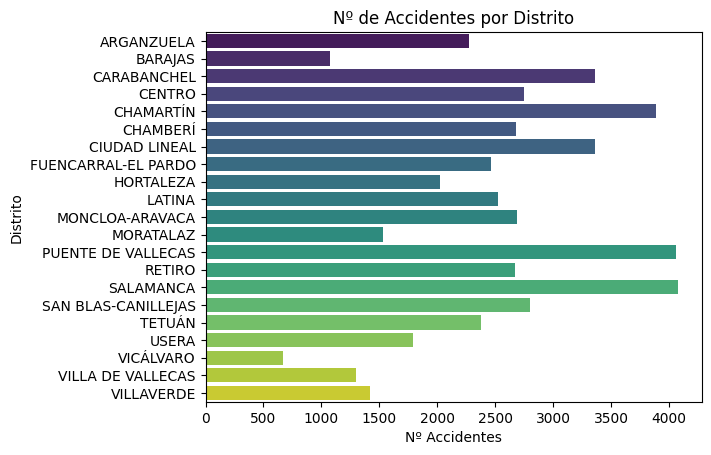

In [224]:
sns.barplot(acc_distrito, x='Nº Accidentes', y='Distrito', palette='viridis')
plt.title('Nº de Accidentes por Distrito')
plt.xlabel('Nº Accidentes')
plt.ylabel('Distrito')